In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#exploring the dataset
dataset = pd.read_csv(r"D:\Brain_stroke_detection\brain_stroke.csv")
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
#Checking the shape and info of dataset
dataset.shape
dataset.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

In [4]:
#Preprocessing the dataset
# Changing the text attributes as numerical values
dataset['gender'] = dataset['gender'].map({'Female':1,'Male':0})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
dataset['Residence_type'] = dataset['Residence_type'].map({'Urban': 1, 'Rural':0})
dataset['smoking_status'] = dataset['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

In [5]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,0,0,0,70.15,29.8,0,0
4977,0,40.0,0,0,1,0,1,191.15,31.1,2,0
4978,1,45.0,1,0,1,2,0,95.02,31.8,2,0
4979,0,40.0,0,0,1,0,0,83.94,30.0,2,0


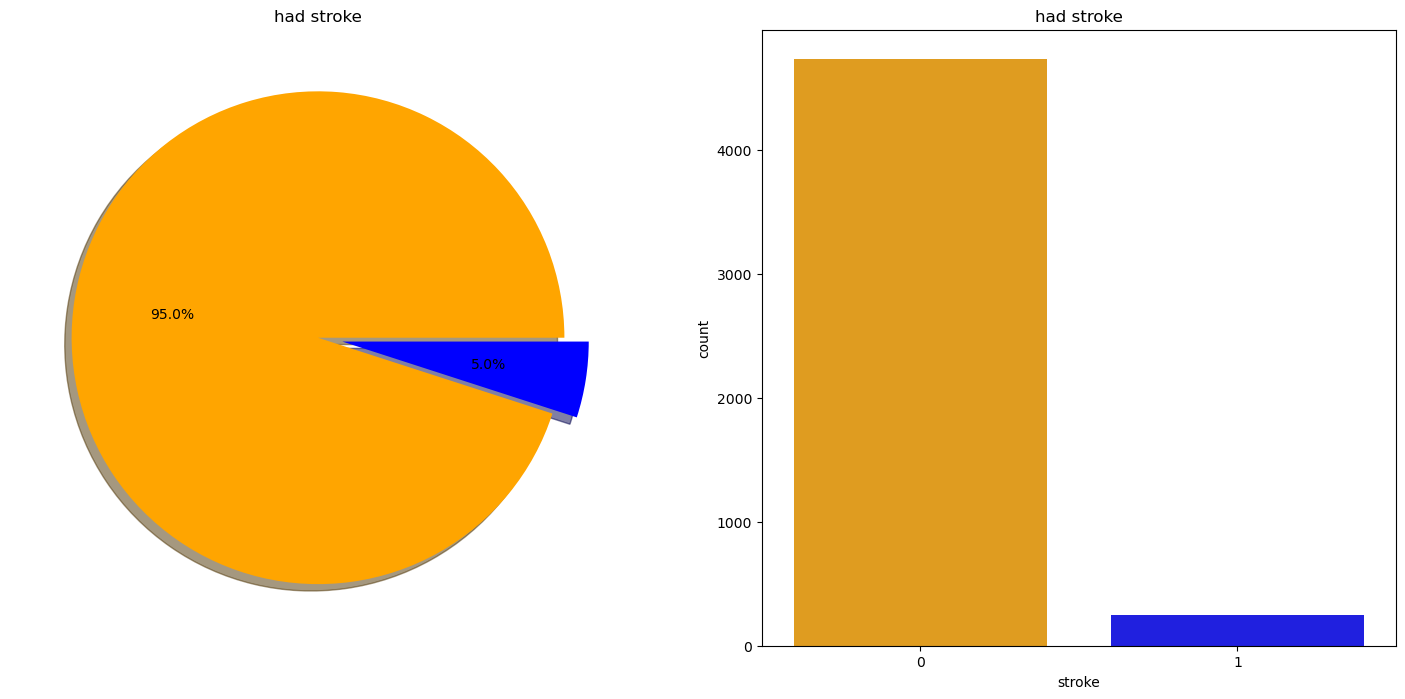

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,8))


axs[0].pie(dataset['stroke'].value_counts(), explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['orange', 'blue']) # Setting colors for the pie chart
axs[0].set_title('had stroke')
axs[0].set_ylabel('')


sns.countplot(x='stroke', data=dataset, ax=axs[1], palette=['orange', 'blue']) # Setting colors for the countplot
axs[1].set_title('had stroke')

plt.show()

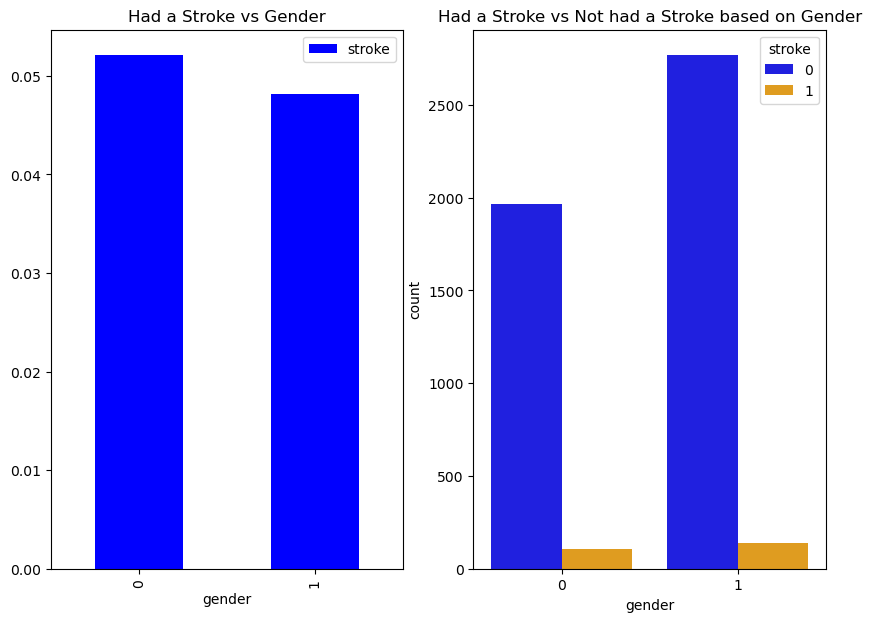

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

dataset[['gender', 'stroke']].groupby(['gender']).mean().plot(kind='bar', ax=axs[0], color=['blue', 'orange']) # Setting colors for the bar plot
axs[0].set_title('Had a Stroke vs Gender')


sns.countplot(x='gender', hue='stroke', data=dataset, ax=axs[1], palette=['blue', 'orange']) # Setting colors for the countplot
axs[1].set_title('Had a Stroke vs Not had a Stroke based on Gender')

plt.show()


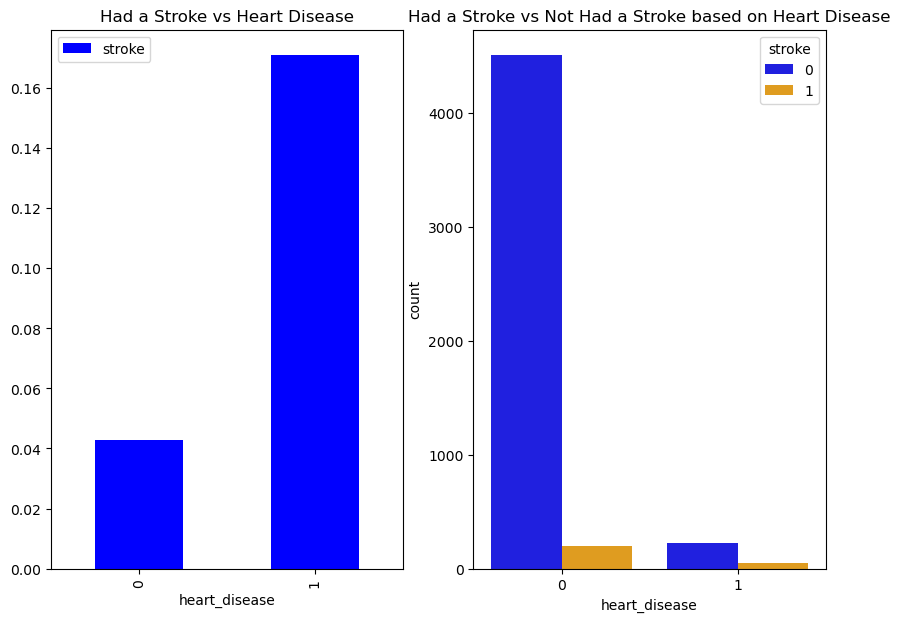

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))


dataset[['heart_disease', 'stroke']].groupby(['heart_disease']).mean().plot(kind='bar', ax=axs[0], color=['blue', 'orange']) # Setting colors for the bar plot
axs[0].set_title('Had a Stroke vs Heart Disease')


sns.countplot(x='heart_disease', hue='stroke', data=dataset, ax=axs[1], palette=['blue', 'orange']) # Setting colors for the countplot
axs[1].set_title('Had a Stroke vs Not Had a Stroke based on Heart Disease')

plt.show()

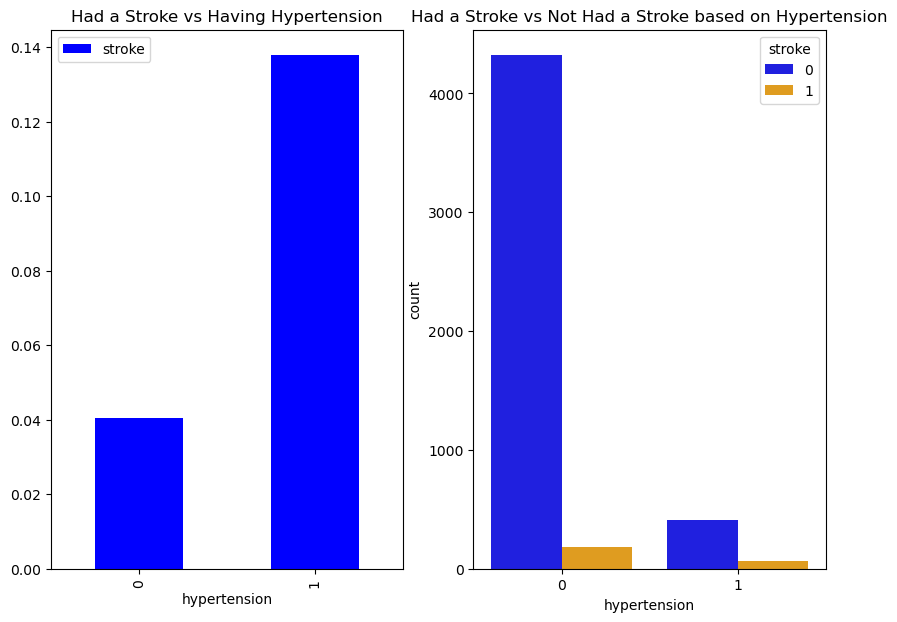

In [9]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))


dataset[['hypertension', 'stroke']].groupby(['hypertension']).mean().plot(kind='bar', ax=axs[0], color=['blue', 'orange']) # Setting colors for the bar plot
axs[0].set_title('Had a Stroke vs Having Hypertension')


sns.countplot(x='hypertension', hue='stroke', data=dataset, ax=axs[1], palette=['blue', 'orange']) # Setting colors for the countplot
axs[1].set_title('Had a Stroke vs Not Had a Stroke based on Hypertension')

plt.show()

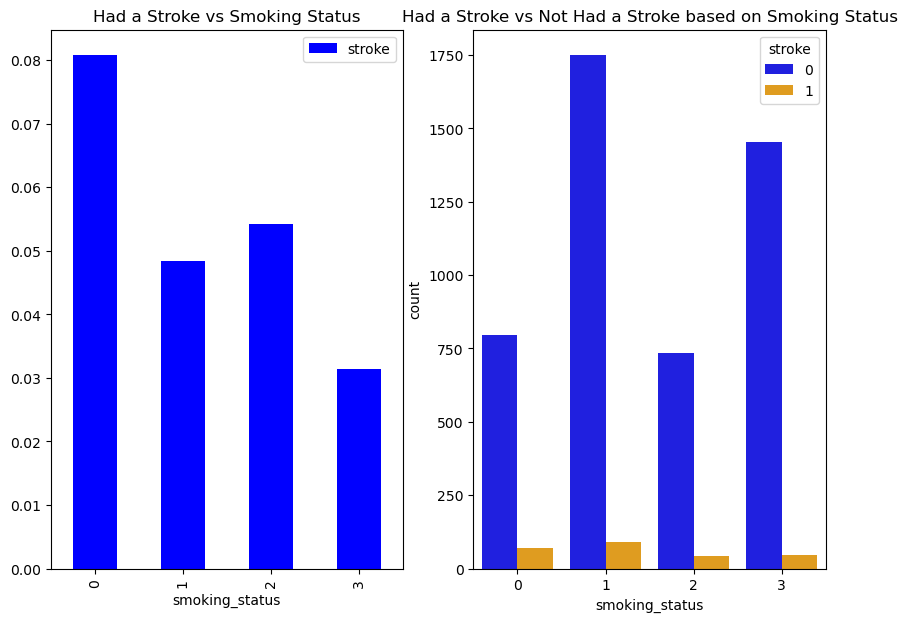

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

dataset[['smoking_status', 'stroke']].groupby(['smoking_status']).mean().plot(kind='bar', ax=axs[0], color=['blue', 'orange']) # Setting colors for the bar plot
axs[0].set_title('Had a Stroke vs Smoking Status')


sns.countplot(x='smoking_status', hue='stroke', data=dataset, ax=axs[1], palette=['blue', 'orange']) # Setting colors for the countplot
axs[1].set_title('Had a Stroke vs Not Had a Stroke based on Smoking Status')

plt.show()

In [11]:
#Checking if any null value is present
dataset.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [12]:
# Check duplicacy
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4976    False
4977    False
4978    False
4979    False
4980    False
Length: 4981, dtype: bool

In [13]:
# Get the summary
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.583618,43.419859,0.096165,0.055210,0.658502,0.825336,0.508332,105.943562,28.498173,1.584019,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,1.101664,0.499981,45.075373,6.790464,1.092516,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.230000,23.700000,1.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.850000,28.100000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,3.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


<AxesSubplot:>

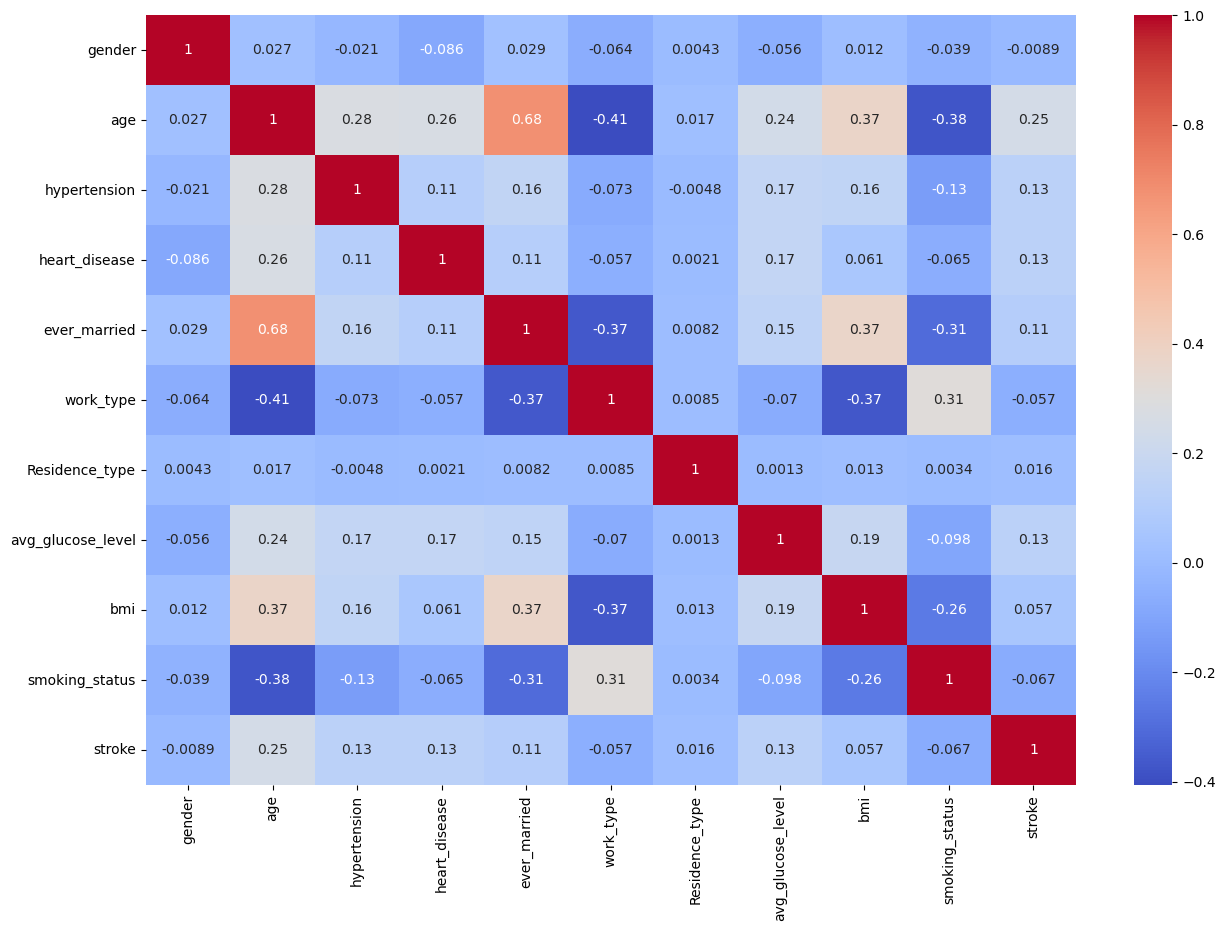

In [14]:
#Checking the correlation with heatmap
#No columns were dropped as there is not significant negative correlation

plt.figure(figsize = (15, 10))
sns.heatmap(dataset.corr(), annot = True, cmap = 'coolwarm')

In [15]:
#plt.figure(figsize = (15, 10))
#sns.heatmap(dataset.corr(), annot = True, cmap = 'coolwarm')
dataset.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.026538,-0.021485,-0.086476,0.028971,-0.063684,0.004301,-0.055796,0.012093,-0.039050,-0.008870
age,0.026538,1.000000,0.278120,0.264852,0.677137,-0.406469,0.017155,0.236763,0.373703,-0.377088,0.246478
hypertension,-0.021485,0.278120,1.000000,0.111974,0.164534,-0.073155,-0.004755,0.170028,0.158762,-0.127008,0.131965
heart_disease,-0.086476,0.264852,0.111974,1.000000,0.114765,-0.056632,0.002125,0.166847,0.060926,-0.064861,0.134610
ever_married,0.028971,0.677137,0.164534,0.114765,1.000000,-0.365538,0.008191,0.150724,0.371690,-0.306390,0.108398
work_type,-0.063684,-0.406469,-0.073155,-0.056632,-0.365538,1.000000,0.008475,-0.069794,-0.369027,0.312169,-0.056713
Residence_type,0.004301,0.017155,-0.004755,0.002125,0.008191,0.008475,1.000000,0.001346,0.013185,0.003405,0.016494
avg_glucose_level,-0.055796,0.236763,0.170028,0.166847,0.150724,-0.069794,0.001346,1.000000,0.186348,-0.097531,0.133227
bmi,0.012093,0.373703,0.158762,0.060926,0.371690,-0.369027,0.013185,0.186348,1.000000,-0.255127,0.056926
smoking_status,-0.039050,-0.377088,-0.127008,-0.064861,-0.306390,0.312169,0.003405,-0.097531,-0.255127,1.000000,-0.066612


In [16]:
#Checking the data for imbalace
dataset["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [17]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [18]:
#Resampling the data to remove the imbalance of data
!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE
s1=SMOTE()
x_data,y_data=s1.fit_resample(x,y)

In [19]:
#Data imbalance removed
from collections import Counter
print(Counter(y_data))

Counter({1: 4733, 0: 4733})


In [20]:
dataset.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.026538,-0.021485,-0.086476,0.028971,-0.063684,0.004301,-0.055796,0.012093,-0.039050,-0.008870
age,0.026538,1.000000,0.278120,0.264852,0.677137,-0.406469,0.017155,0.236763,0.373703,-0.377088,0.246478
hypertension,-0.021485,0.278120,1.000000,0.111974,0.164534,-0.073155,-0.004755,0.170028,0.158762,-0.127008,0.131965
heart_disease,-0.086476,0.264852,0.111974,1.000000,0.114765,-0.056632,0.002125,0.166847,0.060926,-0.064861,0.134610
ever_married,0.028971,0.677137,0.164534,0.114765,1.000000,-0.365538,0.008191,0.150724,0.371690,-0.306390,0.108398
work_type,-0.063684,-0.406469,-0.073155,-0.056632,-0.365538,1.000000,0.008475,-0.069794,-0.369027,0.312169,-0.056713
Residence_type,0.004301,0.017155,-0.004755,0.002125,0.008191,0.008475,1.000000,0.001346,0.013185,0.003405,0.016494
avg_glucose_level,-0.055796,0.236763,0.170028,0.166847,0.150724,-0.069794,0.001346,1.000000,0.186348,-0.097531,0.133227
bmi,0.012093,0.373703,0.158762,0.060926,0.371690,-0.369027,0.013185,0.186348,1.000000,-0.255127,0.056926
smoking_status,-0.039050,-0.377088,-0.127008,-0.064861,-0.306390,0.312169,0.003405,-0.097531,-0.255127,1.000000,-0.066612


In [21]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_scaled=mms.fit_transform(x_data)
x_scaled

array([[0.        , 0.81689453, 0.        , ..., 0.80126489, 0.64756447,
        0.        ],
       [0.        , 0.97558594, 0.        , ..., 0.23451205, 0.53008596,
        0.33333333],
       [1.        , 0.59716797, 0.        , ..., 0.53600776, 0.58452722,
        0.66666667],
       ...,
       [0.18487396, 0.83587185, 0.81512604, ..., 0.99281397, 0.53023043,
        0.60504201],
       [1.        , 0.92992121, 0.        , ..., 0.23860443, 0.41652976,
        0.04319086],
       [0.51499917, 0.7185059 , 0.        , ..., 0.25863563, 0.39879653,
        0.83833306]])

In [22]:
#Standardization
from sklearn.preprocessing import StandardScaler
a1=StandardScaler()
z=a1.fit_transform(x_data)

In [23]:
#Splitting the train and teat data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,test_size=0.2,random_state=10)

In [25]:
#Applying logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
l1=LogisticRegression()
l1.fit(x_train,y_train)

LogisticRegression()

In [26]:
l1_pred=l1.predict(x_test)
l1_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
#Checking performance of Logistice regression algorithm 
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_test,l1_pred)*100
precision = precision_score(y_test, l1_pred)*100
recall = recall_score(y_test, l1_pred)*100
F1 = 2 * (precision * recall) / (precision + recall)


In [28]:
print('Accuracy: ',accuracy1)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',F1)

Accuracy:  76.55755015839493
Precision:  74.92654260528894
Recall:  80.27282266526757
F1 Score:  77.50759878419453


In [29]:
y_pred = l1.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

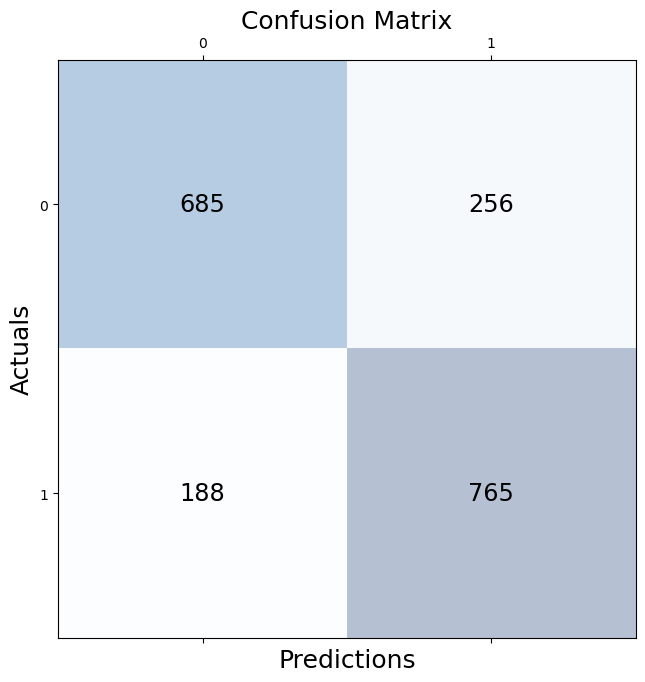

In [30]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

C:\Users\akash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


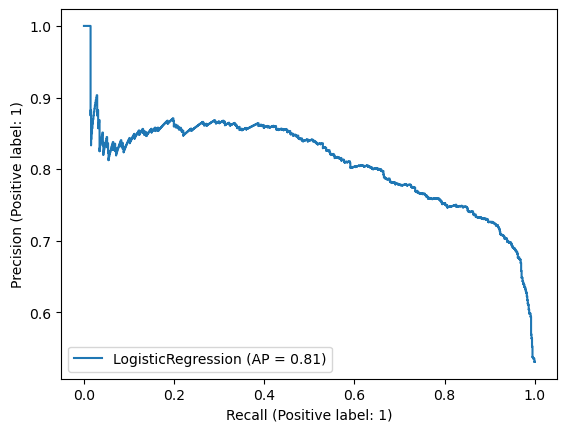

In [31]:
disp = plot_precision_recall_curve(l1, x_test, y_test)

In [32]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.78      0.73      0.76       941
           1       0.75      0.80      0.78       953

    accuracy                           0.77      1894
   macro avg       0.77      0.77      0.77      1894
weighted avg       0.77      0.77      0.77      1894



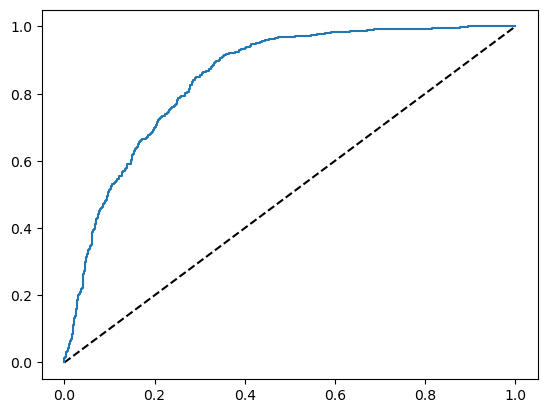

In [33]:
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
y_pred_prob = l1.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [34]:
#Applying Naive bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [35]:
nb_pred=nb.predict(x_test)
nb_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
#Checking performance of Naive bayes
accuracy2=accuracy_score(y_test,nb_pred)*100
precision = precision_score(y_test, nb_pred)*100
recall = recall_score(y_test, nb_pred)*100
F1 = 2 * (precision * recall) / (precision + recall)


In [37]:
print('Accuracy: ',accuracy2)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',F1)

Accuracy:  77.19112988384371
Precision:  73.70336669699728
Recall:  84.99475341028332
F1 Score:  78.94736842105264


In [38]:
y_pred = nb.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

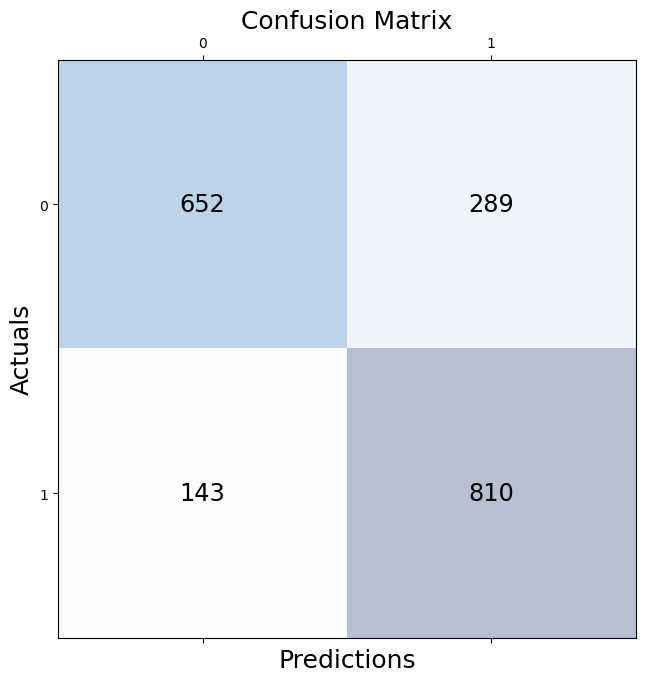

In [39]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

C:\Users\akash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


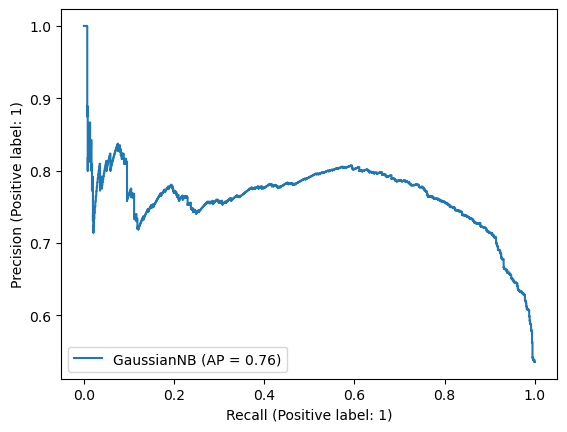

In [40]:
disp = plot_precision_recall_curve(nb, x_test, y_test)

In [41]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       941
           1       0.74      0.85      0.79       953

    accuracy                           0.77      1894
   macro avg       0.78      0.77      0.77      1894
weighted avg       0.78      0.77      0.77      1894



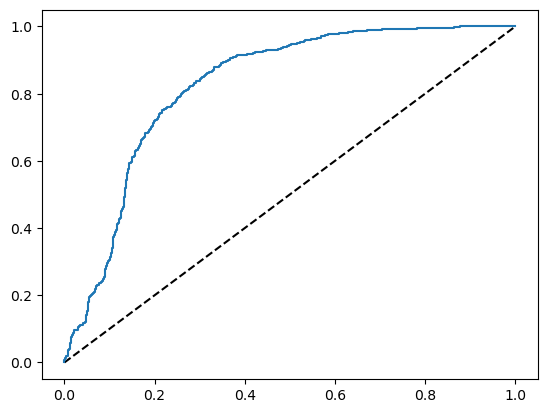

In [42]:
y_pred_prob = nb.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [43]:
#Applying K-nearest neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(p=1)

In [44]:
knn_pred=knn.predict(x_test)
knn_pred

C:\Users\akash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [45]:
##Checking performance of K-nearest neighbour Algorithm
accuracy3=accuracy_score(y_test,knn_pred)*100
precision = precision_score(y_test, knn_pred)*100
recall = recall_score(y_test, knn_pred)*100
F1 = 2 * (precision * recall) / (precision + recall)

In [46]:
print('Accuracy: ',accuracy3)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',F1)

Accuracy:  95.19535374868005
Precision:  93.01397205588823
Recall:  97.79643231899266
F1 Score:  95.3452685421995


In [47]:
y_pred = knn.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

C:\Users\akash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


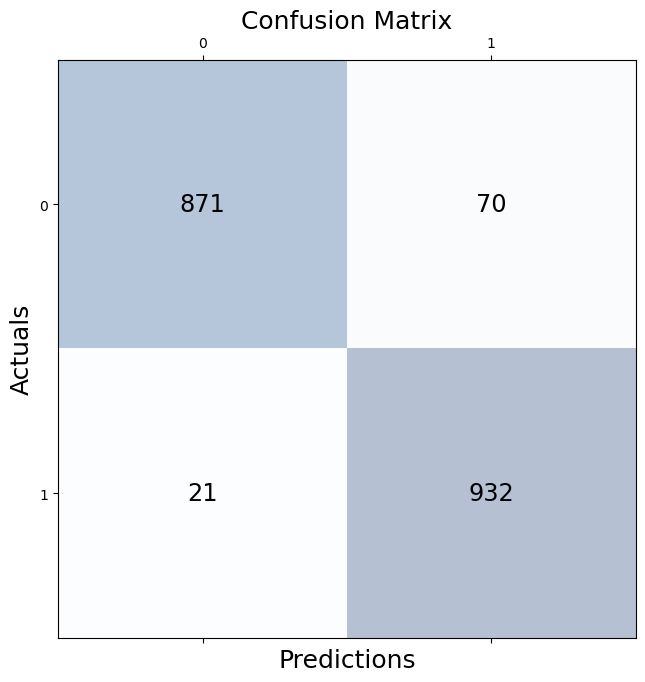

In [48]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

C:\Users\akash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


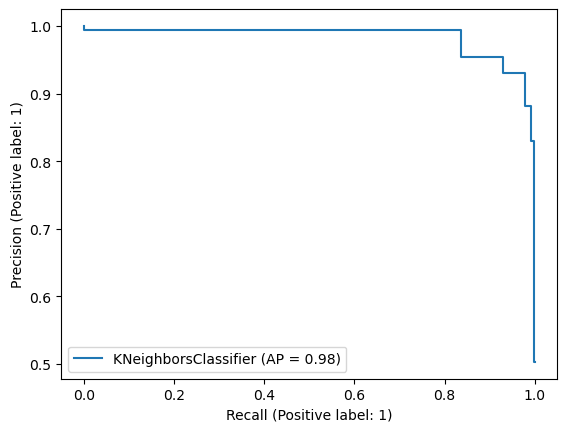

In [49]:
disp = plot_precision_recall_curve(knn, x_test, y_test)

In [50]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       941
           1       0.93      0.98      0.95       953

    accuracy                           0.95      1894
   macro avg       0.95      0.95      0.95      1894
weighted avg       0.95      0.95      0.95      1894



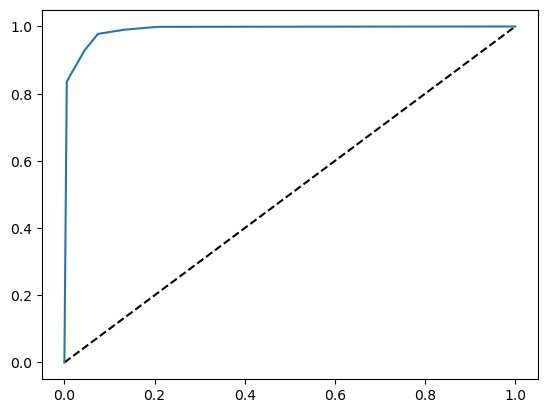

In [51]:
y_pred_prob = knn.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()